<a href="https://colab.research.google.com/github/prasys/qrc-mlteamprojects/blob/kyle/model_training_saving_pipeline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ML Model Evaluation Notebook**

---

## Packages and Data Loading

In [19]:
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=10K4Qe2NFZhqy0aWYaQz5050K-ycpUTco' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=10K4Qe2NFZhqy0aWYaQz5050K-ycpUTco" -O creditcard.csv && rm -rf /tmp/cookies.txt

--2023-11-27 19:48:12--  https://docs.google.com/uc?export=download&confirm=t&id=10K4Qe2NFZhqy0aWYaQz5050K-ycpUTco
Resolving docs.google.com (docs.google.com)... 74.125.139.139, 74.125.139.113, 74.125.139.138, ...
Connecting to docs.google.com (docs.google.com)|74.125.139.139|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-04-4c-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/6dfj6is8irdpqcvp55b6vbtblvmro5te/1701114450000/17337244698426673086/*/10K4Qe2NFZhqy0aWYaQz5050K-ycpUTco?e=download&uuid=798f6841-5537-4004-90e6-4f4fe564865e [following]
--2023-11-27 19:48:12--  https://doc-04-4c-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/6dfj6is8irdpqcvp55b6vbtblvmro5te/1701114450000/17337244698426673086/*/10K4Qe2NFZhqy0aWYaQz5050K-ycpUTco?e=download&uuid=798f6841-5537-4004-90e6-4f4fe564865e
Resolving doc-04-4c-docs.googleusercontent.com (doc-04-4c-docs.googleusercontent.com)... 74.125.134.132, 

In [20]:
import os

# Directory for saving models
models_dir = 'models'
if not os.path.exists(models_dir):
    os.makedirs(models_dir)

In [21]:
!wget https://github.com/prasys/qrc-mlteamprojects/raw/main/autoML.joblib -O ./models/autoML.joblib


--2023-11-27 19:48:13--  https://github.com/prasys/qrc-mlteamprojects/raw/main/autoML.joblib
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/prasys/qrc-mlteamprojects/main/autoML.joblib [following]
--2023-11-27 19:48:13--  https://raw.githubusercontent.com/prasys/qrc-mlteamprojects/main/autoML.joblib
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2166539 (2.1M) [application/octet-stream]
Saving to: ‘./models/autoML.joblib’

./models/autoML.job 100%[===================>]   2.07M  --.-KB/s    in 0.08s   

2023-11-27 19:48:14 (25.9 MB/s) - ‘./models/autoML.joblib’ saved [2166539/2166539]



In [22]:
!pip install flaml

In [23]:
# --- Basic Data Handling and Visualization ---
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time

# --- Machine Learning Models ---
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, precision_recall_curve, confusion_matrix

## Parameters and Data Preprocessing

In [24]:
# --- Parameters ---
DATA_FILE = "creditcard.csv"
TEST_SIZE = 0.2
RANDOM_STATE = 42

# --- Data Loading and Preprocessing ---
data = pd.read_csv(DATA_FILE)
y = data['Class']
X = data.drop(columns="Class")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TEST_SIZE, random_state=RANDOM_STATE)

print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)


# Save X_test and y_test as CSV files
X_test.to_csv('X_test.csv', index=False)
y_test.to_csv('y_test.csv', index=False)

X_test shape: (56962, 30)
y_test shape: (56962,)


##  Model Fitting Functions and Evaluations

### Linear and Logistic Regression

In [25]:
# --- Model Fitting Function ---

def fit_model(Model, X_train, y_train):
    return Model().fit(X_train, y_train)

# --- Model Evaluation Function ---

def evaluate_model(model, X_train, y_train, X_test, y_test):
    train_score = model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)
    return train_score, test_score

# --- Linear Regression ---

model_lin_reg = fit_model(LinearRegression, X_train, y_train)
lin_reg_train_score, lin_reg_test_score = evaluate_model(model_lin_reg, X_train, y_train, X_test, y_test)

# --- Logistic Regression ---

model_log_reg = make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000)).fit(X_train, y_train)
log_reg_train_score, log_reg_test_score = evaluate_model(model_log_reg, X_train, y_train, X_test, y_test)

# --- Results Compilation ---

results = {
    "Model": ["Linear Regression", "Logistic Regression"],
    "Train Score": [lin_reg_train_score, log_reg_train_score],
    "Test Score": [lin_reg_test_score, log_reg_test_score],
}
results_df = pd.DataFrame(results)

# --- Display Results ---

results_df.head()

,Model,Train Score,Test Score
0,Linear Regression,0.522842,0.516666
1,Logistic Regression,0.999232,0.999122


In [26]:
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from joblib import dump, load

# --- Model Definitions ---
models = {

    "Standard_LogisticRegression": make_pipeline(
        StandardScaler(),
        LogisticRegression(random_state=RANDOM_STATE)
    ),

    "Manual_DecisionTree": DecisionTreeClassifier(max_depth=5, min_samples_split=10, random_state=RANDOM_STATE),

    "AutoML_LightGBM": LGBMClassifier(
        colsample_bytree=0.9966304260225635,
        learning_rate=0.5048539408101554,
        max_bin=1023,
        min_child_samples=13,
        n_estimators=20,
        num_leaves=4,
        reg_alpha=0.0009765625,
        reg_lambda=1.860018729197888,
        verbose=-1,
        n_jobs=-1
    ),

    "AutoML_XGBoost": XGBClassifier(
        colsample_bylevel=0.804197114419627,
        learning_rate=0.7638336460324597,
        max_depth=9,
        min_child_weight=0.024918743129509396,
        n_estimators=84,
        n_jobs=-1,
        missing=0  # Set missing to a valid value (e.g., 0)
    ),


}

def evaluate_and_save_model(model, model_name, X_train, y_train, X_test, y_test, use_smote=False):
    start_time = time.time()

    # Use SMOTE-augmented data if specified
    if use_smote:
        X_train_used, y_train_used = X_train_smote, y_train_smote
    else:
        X_train_used, y_train_used = X_train, y_train

    model.fit(X_train_used, y_train_used)
    y_train_pred = model.predict(X_train_used)
    y_test_pred = model.predict(X_test)

    # Calculate training metrics using y_train_used and y_train_pred
    train_acc = round(accuracy_score(y_train_used, y_train_pred), 4)
    train_recall = round(recall_score(y_train_used, y_train_pred), 4)
    train_precision = round(precision_score(y_train_used, y_train_pred), 4)
    train_f1 = round(f1_score(y_train_used, y_train_pred), 4)

    # Calculate testing metrics using y_test and y_test_pred
    test_acc = round(accuracy_score(y_test, y_test_pred), 4)
    test_recall = round(recall_score(y_test, y_test_pred), 4)
    test_precision = round(precision_score(y_test, y_test_pred), 4)
    test_f1 = round(f1_score(y_test, y_test_pred), 4)

    end_time = time.time()
    runtime = f"{int(end_time - start_time) // 60} min {round((end_time - start_time) % 60, 2)} sec"

    # Save the model in the 'models' directory
    model_path = os.path.join(models_dir, f'{model_name}.joblib')
    dump(model, model_path)

    return [train_acc, train_recall, train_precision, train_f1, test_acc, test_recall, test_precision, test_f1, runtime]

# --- Model Training, Evaluation, and Saving ---
results = []
for name, model in models.items():
    model_results = [name] + evaluate_and_save_model(model, name, X_train, y_train, X_test, y_test)
    results.append(model_results)

# --- Results Presentation ---
columns = ['Model', 'Train Accuracy', 'Train Recall', 'Train Precision', 'Train F1 Score', 'Test Accuracy', 'Test Recall', 'Test Precision', 'Test F1 Score', 'Runtime']
results_df = pd.DataFrame(results, columns=columns)
results_df.head()

,Model,Train Accuracy,Train Recall,Train Precision,Train F1 Score,Test Accuracy,Test Recall,Test Precision,Test F1 Score,Runtime
0,Standard_LogisticRegression,0.9992,0.6294,0.8953,0.7392,0.9991,0.5816,0.8636,0.6951,0 min 6.64 sec
1,Manual_DecisionTree,0.9996,0.8071,0.9408,0.8689,0.9995,0.7857,0.9059,0.8415,0 min 33.88 sec
2,AutoML_LightGBM,0.9995,0.8046,0.9006,0.8499,0.9994,0.8061,0.8404,0.8229,0 min 9.66 sec
3,AutoML_XGBoost,1.0000,1.0000,1.0000,1.0000,0.9996,0.7653,0.9740,0.8571,0 min 16.03 sec


## Load Models to Test Function


In [27]:
from joblib import dump, load
model_paths = [

    # eg for main
    # 'autoML.joblib',

    # Model Directory
    os.path.join(models_dir, 'autoML.joblib'),
    os.path.join(models_dir, 'Standard_LogisticRegression.joblib'),
    os.path.join(models_dir, 'Manual_DecisionTree.joblib'),
    os.path.join(models_dir, 'AutoML_LightGBM.joblib'),
    os.path.join(models_dir, 'AutoML_XGBoost.joblib')
    # Add more model paths as needed
]

# --- Model Evaluation Function ---
def evaluate_model(model, X_test, y_test):
    start_time = time.time()

    # Making predictions as the model is already trained
    y_test_pred = model.predict(X_test)

    # Calculate metrics
    test_acc = round(accuracy_score(y_test, y_test_pred), 4)
    test_recall = round(recall_score(y_test, y_test_pred), 4)
    test_precision = round(precision_score(y_test, y_test_pred), 4)
    test_f1 = round(f1_score(y_test, y_test_pred), 4)

    end_time = time.time()
    runtime = f"{round((end_time - start_time) % 60, 2)} sec"

    return [test_acc, test_recall, test_precision, test_f1, runtime]

# Evaluate each model in the array
results = []
for model_path in model_paths:
    model = load(model_path)
    model_name = model_path.split('/')[-1]  # Extracting model name from the path
    model_results = [model_name] + evaluate_model(model, X_test, y_test)
    results.append(model_results)

# Display the results
columns = ['Model', 'Test Accuracy', 'Test Recall', 'Test Precision', 'Test F1 Score', 'Runtime']
results_df = pd.DataFrame(results, columns=columns)
results_df.head()


,Model,Test Accuracy,Test Recall,Test Precision,Test F1 Score,Runtime
0,autoML.joblib,0.9996,0.7959,0.9873,0.8814,1.15 sec
1,Standard_LogisticRegression.joblib,0.9991,0.5816,0.8636,0.6951,0.11 sec
2,Manual_DecisionTree.joblib,0.9995,0.7857,0.9059,0.8415,0.07 sec
3,AutoML_LightGBM.joblib,0.9994,0.8061,0.8404,0.8229,0.09 sec
4,AutoML_XGBoost.joblib,0.9996,0.7653,0.9740,0.8571,0.23 sec


# SMOTE MODELS

In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE


# Applying SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)


In [29]:
print(len(y_train))
print(len(y_train_smote))

227845
454902


In [30]:
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from joblib import dump

# --- Model Definitions ---
models = {

    "Smote_Standard_LogisticRegression": make_pipeline(
        StandardScaler(),
        LogisticRegression(random_state=RANDOM_STATE)
    ),

    "Smote_Manual_DecisionTree": DecisionTreeClassifier(max_depth=5, min_samples_split=10, random_state=RANDOM_STATE),

    "Smote_AutoML_LightGBM": LGBMClassifier(
        colsample_bytree=0.9966304260225635,
        learning_rate=0.5048539408101554,
        max_bin=1023,
        min_child_samples=13,
        n_estimators=20,
        num_leaves=4,
        reg_alpha=0.0009765625,
        reg_lambda=1.860018729197888,
        verbose=-1,
        n_jobs=-1
    ),

    "Smote_AutoML_XGBoost": XGBClassifier(
        colsample_bylevel=0.804197114419627,
        learning_rate=0.7638336460324597,
        max_depth=9,
        min_child_weight=0.024918743129509396,
        n_estimators=84,
        n_jobs=-1,
        missing=0
    ),


}

def evaluate_and_save_model(model, model_name, X_train_smote, y_train_smote, X_test, y_test):
    start_time = time.time()
    model.fit(X_train_smote, y_train_smote)
    y_train_pred = model.predict(X_train_smote)
    y_test_pred = model.predict(X_test)

    # Use y_train_smote for calculating training metrics
    train_acc = round(accuracy_score(y_train_smote, y_train_pred), 4)
    train_recall = round(recall_score(y_train_smote, y_train_pred), 4)
    train_precision = round(precision_score(y_train_smote, y_train_pred), 4)
    train_f1 = round(f1_score(y_train_smote, y_train_pred), 4)

    # Use y_test for calculating testing metrics
    test_acc = round(accuracy_score(y_test, y_test_pred), 4)
    test_recall = round(recall_score(y_test, y_test_pred), 4)
    test_precision = round(precision_score(y_test, y_test_pred), 4)
    test_f1 = round(f1_score(y_test, y_test_pred), 4)

    end_time = time.time()
    runtime = f"{int(end_time - start_time) // 60} min {round((end_time - start_time) % 60, 2)} sec"

    # Save the model in the 'models' directory
    model_path = os.path.join(models_dir, f'{model_name}.joblib')
    dump(model, model_path)

    return [train_acc, train_recall, train_precision, train_f1, test_acc, test_recall, test_precision, test_f1, runtime]


# --- Model Training, Evaluation, and Saving ---
results = []
for name, model in models.items():
    model_results = [name] + evaluate_and_save_model(model, name, X_train_smote, y_train_smote, X_test, y_test)
    results.append(model_results)

# --- Results Presentation ---
columns = ['Model', 'Train Accuracy', 'Train Recall', 'Train Precision', 'Train F1 Score', 'Test Accuracy', 'Test Recall', 'Test Precision', 'Test F1 Score', 'Runtime']
results_df = pd.DataFrame(results, columns=columns)
results_df.head()

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,Model,Train Accuracy,Train Recall,Train Precision,Train F1 Score,Test Accuracy,Test Recall,Test Precision,Test F1 Score,Runtime
0,Smote_Standard_LogisticRegression,0.9795,0.9673,0.9916,0.9793,0.9915,0.9184,0.1582,0.2699,0 min 9.23 sec
1,Smote_Manual_DecisionTree,0.9692,0.9579,0.9800,0.9689,0.9807,0.8878,0.0739,0.1365,0 min 16.8 sec
2,Smote_AutoML_LightGBM,0.9822,0.9756,0.9886,0.9820,0.9887,0.9286,0.1248,0.2201,0 min 4.12 sec
3,Smote_AutoML_XGBoost,1.0000,1.0000,1.0000,1.0000,0.9995,0.8469,0.8384,0.8426,0 min 27.84 sec


In [31]:
from joblib import dump, load
model_paths = [

    # eg for main
    # 'autoML.joblib',

    # Model Directory
    os.path.join(models_dir, 'autoML.joblib'),
    os.path.join(models_dir, 'Standard_LogisticRegression.joblib'),
    os.path.join(models_dir, 'Manual_DecisionTree.joblib'),
    os.path.join(models_dir, 'AutoML_LightGBM.joblib'),
    os.path.join(models_dir, 'AutoML_XGBoost.joblib'),
    os.path.join(models_dir, 'Smote_Standard_LogisticRegression.joblib'),
    os.path.join(models_dir, 'Smote_Manual_DecisionTree.joblib'),
    os.path.join(models_dir, 'Smote_AutoML_LightGBM.joblib'),
    os.path.join(models_dir, 'Smote_AutoML_XGBoost.joblib')
    # Add more model paths as needed
]

# --- Model Evaluation Function ---
def evaluate_model(model, X_test, y_test):
    start_time = time.time()

    # Making predictions as the model is already trained
    y_test_pred = model.predict(X_test)

    # Calculate metrics
    test_acc = round(accuracy_score(y_test, y_test_pred), 4)
    test_recall = round(recall_score(y_test, y_test_pred), 4)
    test_precision = round(precision_score(y_test, y_test_pred), 4)
    test_f1 = round(f1_score(y_test, y_test_pred), 4)

    end_time = time.time()
    runtime = f"{round((end_time - start_time) % 60, 2)} sec"

    return [test_acc, test_recall, test_precision, test_f1, runtime]

# Evaluate each model in the array
results = []
for model_path in model_paths:
    model = load(model_path)
    model_name = model_path.split('/')[-1]  # Extracting model name from the path
    model_results = [model_name] + evaluate_model(model, X_test, y_test)
    results.append(model_results)

# Display the results
columns = ['Model', 'Test Accuracy', 'Test Recall', 'Test Precision', 'Test F1 Score', 'Runtime']
results_df = pd.DataFrame(results, columns=columns)
results_df.head(10)


,Model,Test Accuracy,Test Recall,Test Precision,Test F1 Score,Runtime
0,autoML.joblib,0.9996,0.7959,0.9873,0.8814,1.46 sec
1,Standard_LogisticRegression.joblib,0.9991,0.5816,0.8636,0.6951,0.11 sec
2,Manual_DecisionTree.joblib,0.9995,0.7857,0.9059,0.8415,0.07 sec
3,AutoML_LightGBM.joblib,0.9994,0.8061,0.8404,0.8229,0.1 sec
4,AutoML_XGBoost.joblib,0.9996,0.7653,0.9740,0.8571,0.22 sec
5,Smote_Standard_LogisticRegression.joblib,0.9915,0.9184,0.1582,0.2699,0.14 sec
6,Smote_Manual_DecisionTree.joblib,0.9807,0.8878,0.0739,0.1365,0.06 sec
7,Smote_AutoML_LightGBM.joblib,0.9887,0.9286,0.1248,0.2201,0.09 sec
8,Smote_AutoML_XGBoost.joblib,0.9995,0.8469,0.8384,0.8426,0.24 sec


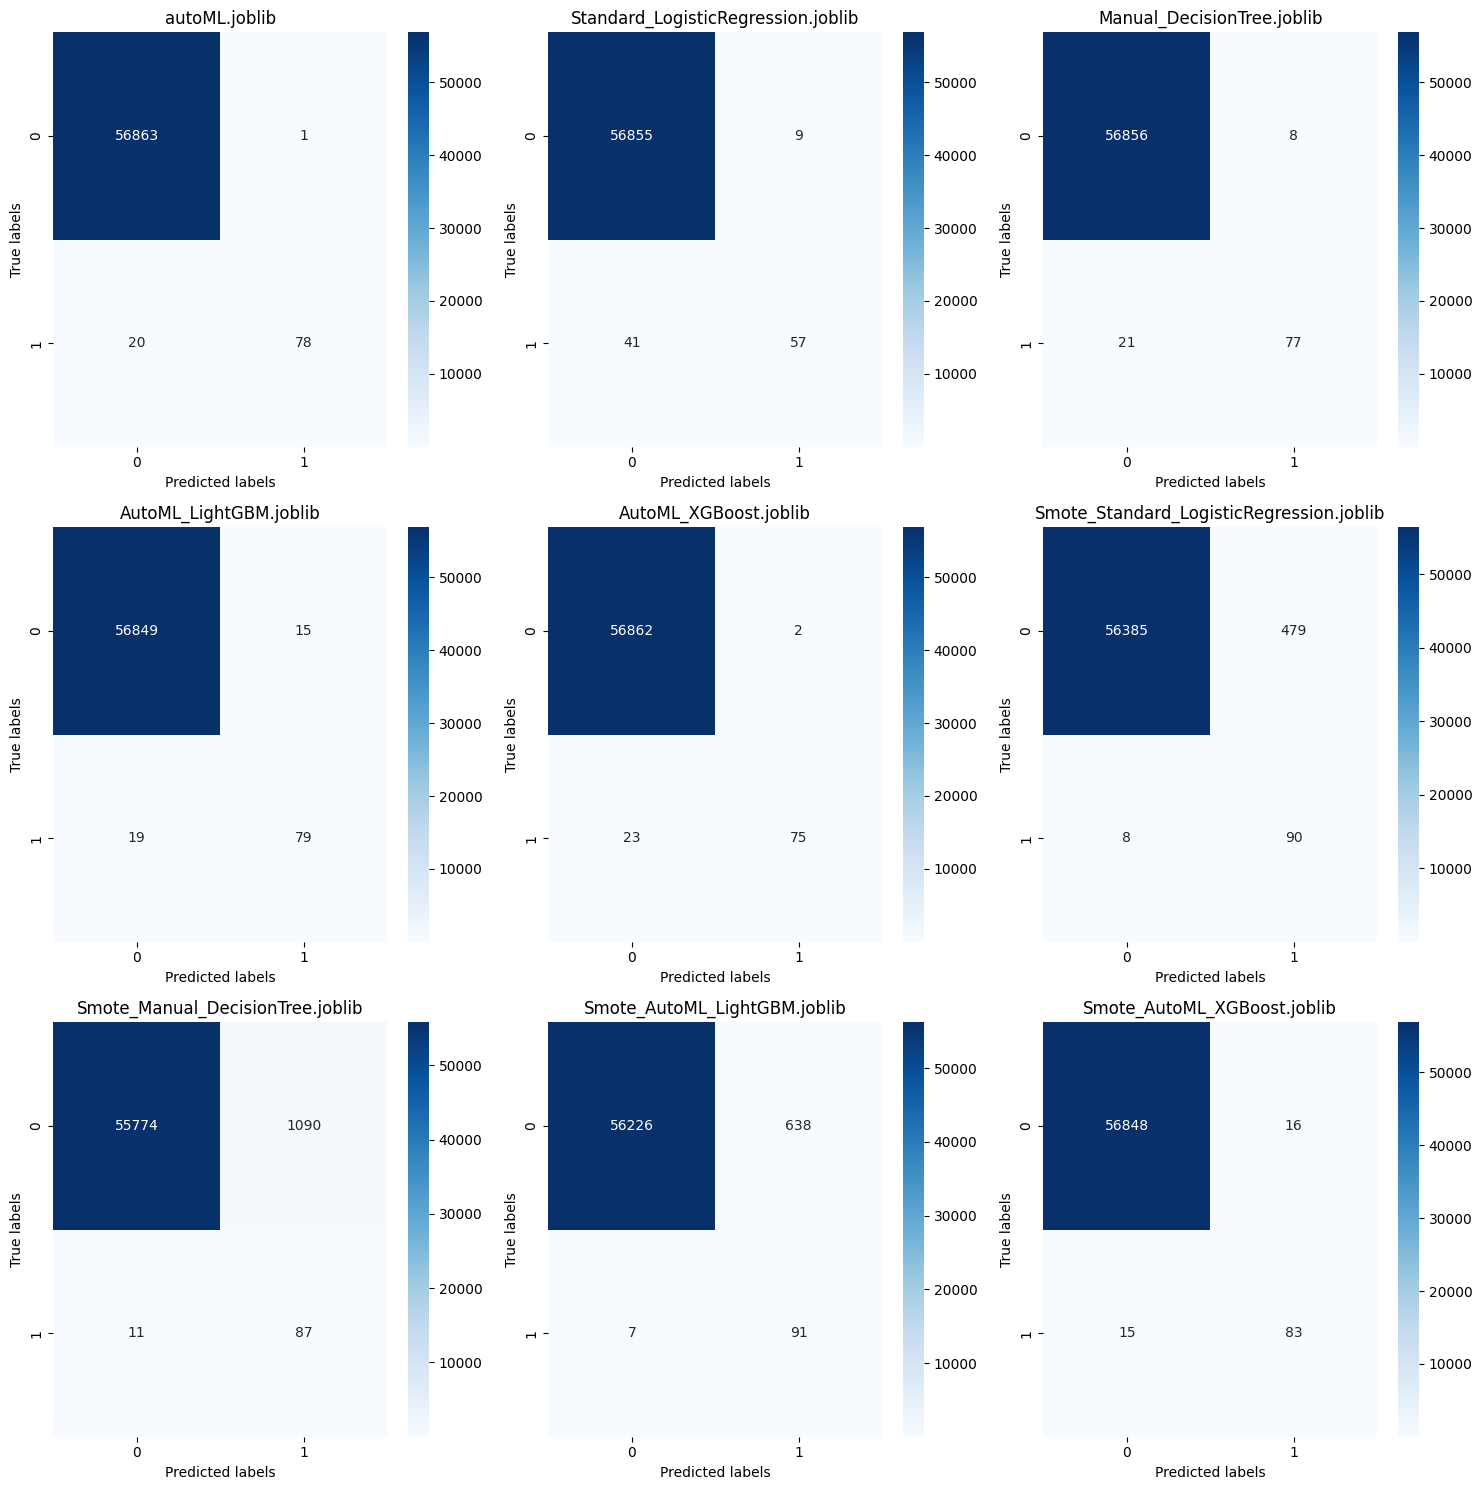

In [32]:
# Plotting
fig, axes = plt.subplots(3, 3, figsize=(15, 15))
axes = axes.flatten()

for i, model_path in enumerate(model_paths):
    model = load(model_path)
    y_test_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_test_pred)
    sns.heatmap(cm, annot=True, fmt='d', ax=axes[i], cmap='Blues')
    axes[i].set_title(model_path.split('/')[-1])
    axes[i].set_xlabel('Predicted labels')
    axes[i].set_ylabel('True labels')

plt.tight_layout()
plt.show()


In [37]:
import plotly.graph_objects as go
import plotly.express as px
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Assuming results_df is your DataFrame
# Filter and sort SMOTE models alphabetically
smote_df = results_df[results_df['Model'].str.contains('Smote')].sort_values(by='Model')
melted_smote = smote_df.melt(id_vars=['Model'], value_vars=['Test Accuracy', 'Test Recall', 'Test Precision', 'Test F1 Score'], var_name='Metric', value_name='Value')

# Filter and sort non-SMOTE models alphabetically, excluding 'autoML.joblib'
non_smote_df = results_df[~results_df['Model'].str.contains('Smote') & ~results_df['Model'].str.contains('autoML.joblib')].sort_values(by='Model')
melted_non_smote = non_smote_df.melt(id_vars=['Model'], value_vars=['Test Accuracy', 'Test Recall', 'Test Precision', 'Test F1 Score'], var_name='Metric', value_name='Value')

# Create subplots
fig = make_subplots(rows=2, cols=1, subplot_titles=("SMOTE Model Performance", "Non-SMOTE Model Performance"))

# Define color scheme
color_scheme = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']  # Blue, Orange, Green, Red

# Add SMOTE models bar chart
for i, metric in enumerate(melted_smote['Metric'].unique()):
    fig.add_trace(
        go.Bar(x=melted_smote[melted_smote['Metric'] == metric]['Model'], y=melted_smote[melted_smote['Metric'] == metric]['Value'], name=metric, marker_color=color_scheme[i]),
        row=1, col=1
    )

# Add non-SMOTE models bar chart
for i, metric in enumerate(melted_non_smote['Metric'].unique()):
    fig.add_trace(
        go.Bar(x=melted_non_smote[melted_non_smote['Metric'] == metric]['Model'], y=melted_non_smote[melted_non_smote['Metric'] == metric]['Value'], name=metric, marker_color=color_scheme[i]),
        row=2, col=1
    )

# Add reference lines for benchmarks
benchmark_values = [0.8, 0.9]  # Example benchmark values
for value in benchmark_values:
    fig.add_hline(y=value, line_dash="dash", line_color="grey", row=1, col=1)
    fig.add_hline(y=value, line_dash="dash", line_color="grey", row=2, col=1)

# Update layout
fig.update_layout(height=800, showlegend=True, title_text="Model Performance Comparison")
fig.update_xaxes(title_text="Model", row=1, col=1)
fig.update_xaxes(title_text="Model", row=2, col=1)
fig.update_yaxes(title_text="Value", row=1, col=1)
fig.update_yaxes(title_text="Value", row=2, col=1)


fig.show()

In [33]:
!zip -r models.zip /content/models

  adding: content/models/ (stored 0%)
  adding: content/models/Smote_Standard_LogisticRegression.joblib (deflated 28%)
  adding: content/models/AutoML_XGBoost.joblib (deflated 62%)
  adding: content/models/Smote_AutoML_LightGBM.joblib (deflated 58%)
  adding: content/models/y_test.csv (deflated 100%)
  adding: content/models/autoML.joblib (deflated 66%)
  adding: content/models/X_test.csv (deflated 54%)
  adding: content/models/Smote_Manual_DecisionTree.joblib (deflated 56%)
  adding: content/models/Smote_AutoML_XGBoost.joblib (deflated 59%)
  adding: content/models/Standard_LogisticRegression.joblib (deflated 28%)
  adding: content/models/Manual_DecisionTree.joblib (deflated 56%)
  adding: content/models/AutoML_LightGBM.joblib (deflated 59%)


In [34]:
from google.colab import files
files.download('models.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [35]:
import os
import shutil
from google.colab import files

# Define the path to the models directory and the desired zip file name
models_dir = '/content/models'
zip_file = 'models.zip'

# Create a zip file of the models directory
shutil.make_archive(base_name=models_dir, format='zip', root_dir=models_dir)

# Download the zip file
files.download(zip_file)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [36]:
import os
import shutil
from google.colab import files

# Define the paths
models_dir = '/content/models'
data_dir = '/content'  # Assuming X_test.csv and y_test.csv are saved here
zip_file = '/content/models.zip'

# Check if X_test.csv and y_test.csv are in the models directory, if not, move them
for file_name in ['X_test.csv', 'y_test.csv']:
    file_path = os.path.join(data_dir, file_name)
    if os.path.exists(file_path) and not os.path.exists(os.path.join(models_dir, file_name)):
        shutil.copy(file_path, models_dir)

# Create a zip file of the models directory including the CSV files
shutil.make_archive(base_name=models_dir, format='zip', root_dir=models_dir)

# Download the zip file
files.download(zip_file)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>